<a href="https://colab.research.google.com/github/ogut77/estat.me/blob/main/Chapter7_6_4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('adabag')
library(adabag)

In [ ]:
data(iris)

In [ ]:
# mfinal is an integer which is the number of iterations for which boosting is run
iris.adaboost <- boosting(Species~., data = iris, boos = TRUE, mfinal = 10)

In [ ]:
# list the importance of variable in the classification
iris.adaboost$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
   66.489301    20.327832     5.313200     7.869667

In [ ]:
# list the trees grown along the iterations.
iris.adaboost$trees

[[1]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 98 setosa (0.34666667 0.31333333 0.34000000)  
  2) Petal.Length< 2.45 52  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 98 47 virginica (0.00000000 0.47959184 0.52040816)  
    6) Petal.Length< 4.75 44  1 versicolor (0.00000000 0.97727273 0.02272727) *
    7) Petal.Length>=4.75 54  4 virginica (0.00000000 0.07407407 0.92592593) *

[[2]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 90 versicolor (0.2533333 0.4000000 0.3466667)  
   2) Petal.Length< 2.7 38  0 setosa (1.0000000 0.0000000 0.0000000) *
   3) Petal.Length>=2.7 112 52 versicolor (0.0000000 0.5357143 0.4642857)  
     6) Petal.Width< 1.75 60  6 versicolor (0.0000000 0.9000000 0.1000000) *
     7) Petal.Width>=1.75 52  6 virginica (0.0000000 0.1153846 0.8846154)  
      14) Petal.Length< 4.85 8  2 versicolor (0.0000000 0.7500000 0.2500000) *
      15) Petal.Length>=

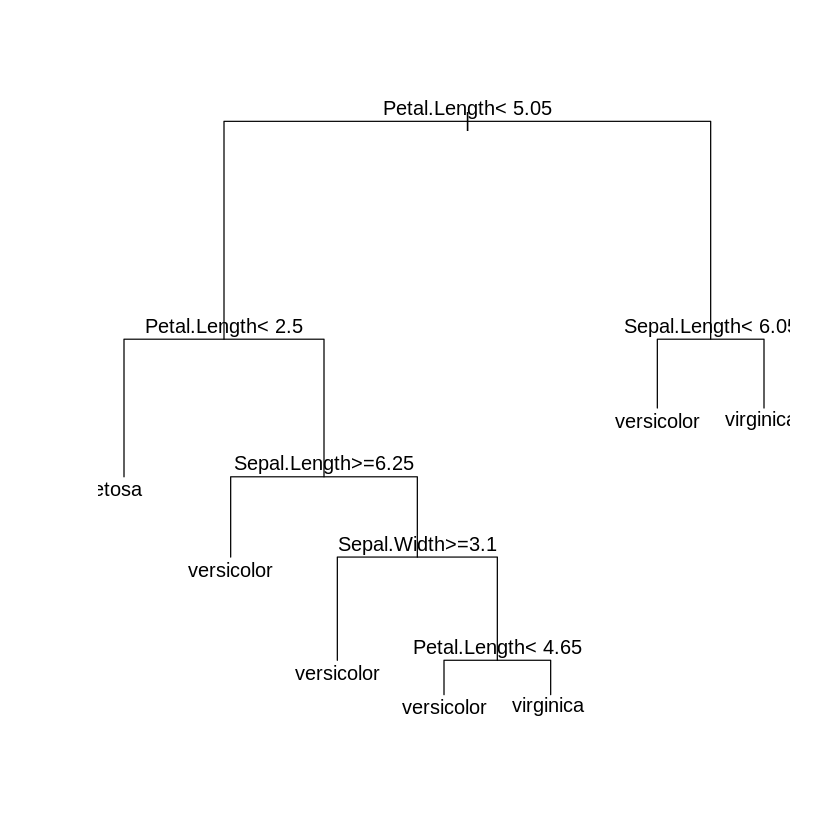

In [ ]:
# plot the decision tree after iteration 10 data
plot(iris.adaboost$trees[[10]])
text(iris.adaboost$trees[[10]])

In [ ]:
# classify the iris data using the adaboosting model
adaboostpred <- predict(iris.adaboost, newdata=iris)

In [ ]:
table(adaboostpred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

In [ ]:
# calculate the misclassification error
adaboosttb <- table(adaboostpred$class, iris[,5])

In [ ]:
adaboosterror <- 1-(sum(diag(adaboosttb))/sum(adaboosttb))

In [ ]:
# misclassification error is 0%
adaboosterror

[1] 0